# Estatística com Python
## Tabela de distribuição de frequência com variável categórica

A tabela de distribuição de frequências é uma ferramenta essencial na estatística descritiva. No caso de variáveis categóricas, a tabela representa a frequência de ocorrências de cada categoria. Ela é composta pelos seguintes cálculos:

- **Frequência Absoluta (Fi)**: Número de ocorrências de cada elemento na amostra.
- **Frequência Relativa (Fri)**: Porcentagem relativa à frequência absoluta.
- **Frequência Acumulada (Fac)**: Soma de todas as ocorrências até o elemento analisado.
- **Frequência Relativa Acumulada (Frac)**: Porcentagem relativa à frequência acumulada.

### data Loading

In [ ]:
# importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
df = sns.load_dataset('tips') # dataset tips

### data exploration and pre-processing

In [15]:
df.head() # primeiras linhas do dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.info() # informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
# renomeando colunas
df.columns = ["Total da Conta", "Valor da Gorjeta", "Sexo", "Fumante", "Dia", "Horário", "Quantidade de Pessoas"]
df.head(3)

,Total da Conta,Valor da Gorjeta,Sexo,Fumante,Dia,Horário,Quantidade de Pessoas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


**Frequência absoluta (Fi)**

In [4]:
fiDia = df['Dia'].value_counts() # fiDia armazena quantas vezes a cada dia aparece no dataset (Fi)
fiDia

Dia
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='Dia'>

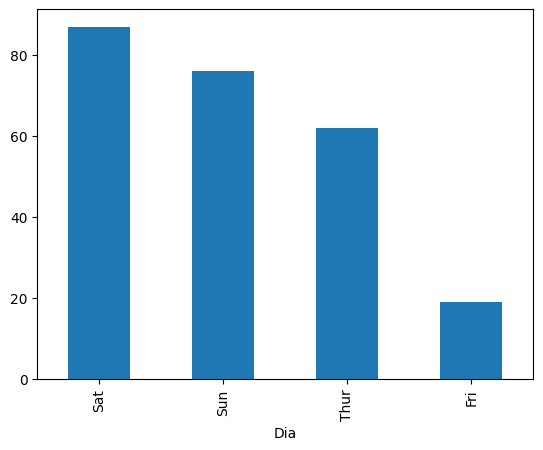

In [17]:
fiDia.plot.bar() # visualização do fiDia

**Frequência relativa absoluta (Fri)**

In [7]:
friDia = (fiDia / df.Dia.count()) * 100 # friDia armazena a porcentagem de cada dia aparece no dataset (Fri)
friDia

Dia
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: count, dtype: float64

<Axes: ylabel='count'>

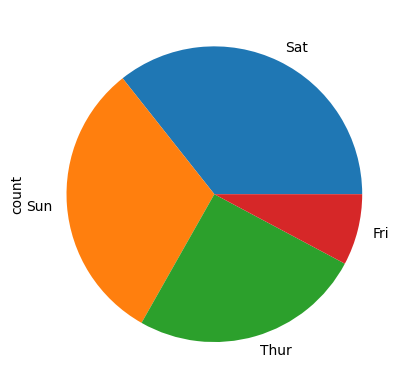

In [23]:
friDia.plot.pie()

**Frequência acumulada (Fac)**

In [21]:
facDia = fiDia.cumsum() # facDia armazena a soma de todas as ocorrências até o elemento analisado (Fac)
facDia

Dia
Sat      87
Sun     163
Thur    225
Fri     244
Name: count, dtype: int64

**Frequência relativa acumulada (Frac)**

In [22]:
fracDia = (facDia / df.Dia.count()) * 100 # fracDia armazena a porcentagem relativa à frequência acumulada (Frac)
fracDia

Dia
Sat      35.655738
Sun      66.803279
Thur     92.213115
Fri     100.000000
Name: count, dtype: float64

**Tabela de distribuição**

In [27]:
tabela = pd.DataFrame({
    'Fi': fiDia,
    'Fri %': round(friDia, 2),
    'Fac': facDia,
    'Frac %': round(fracDia, 2)}) # tabela armazena a tabela de distribuição de frequência (Fi, Fri, Fac, Frac
tabela.reset_index(inplace=True) # resetando o index
tabela

,Dia,Fi,Fri %,Fac,Frac %
0,Sat,87,35.66,87,35.66
1,Sun,76,31.15,163,66.80
2,Thur,62,25.41,225,92.21
3,Fri,19,7.79,244,100.00


### data insights

A análise da distribuição da variável 'Dia' revela padrões claros no comportamento das gorjetas ao longo da semana, com um destaque significativo para os finais de semana, especialmente sábado.

Entender esses padrões permite que o estabelecimento otimize suas operações e estratégias para maximizar os lucros e melhorar a experiência do cliente.

#### **Interpretação dos dias**

- **Sábado (Sat)** possui a maior frequência de gorjetas, com 87 ocorrências sendo 35.66% das gorjetas totais.


- **Domingo (Sun)** vem em seguida, com 76 ocorrências, representa 31.15%.


- **Quinta-feira (Thur)** possui 62 ocorrências e compõe 25,41%.

- **Sexta-feira (Fri)** tem a menor frequência, com 19 ocorrências é responsável por apenas 7.79% das gorjetas.

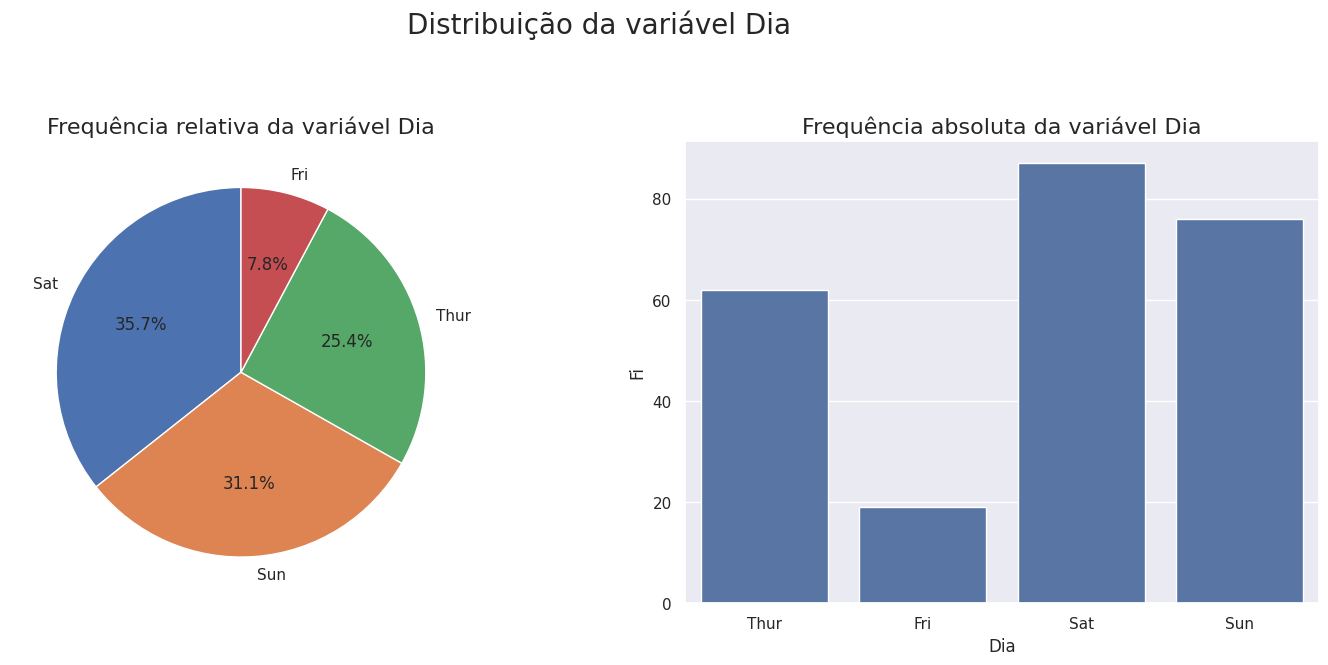

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].pie(tabela['Fi'], labels=tabela['Dia'], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Frequência relativa da variável Dia", fontsize = 16)
sns.barplot(x=tabela['Dia'], y=tabela['Fi'], ax=ax[1]);
ax[1].set_title("Frequência absoluta da variável Dia", fontsize = 16)
fig.suptitle("Distribuição da variável Dia", fontsize = 20, y=1.1)
plt.show()


#### **Insights**

#### Concentração de Gorjetas nos Finais de Semana


---


Sábado e domingo, combinados, representam uma alta porcentagem das gorjetas (66.81%). Isso sugere que os finais de semana são períodos significativamente mais movimentados e lucrativos para os funcionários, possivelmente devido ao aumento de clientela nesses dias.

<br>

#### Dias de Semana Menos Movimentados


---


Quinta-feira e sexta-feira têm uma menor contribuição para o total de gorjetas, com quinta-feira representando 25.41% e sexta-feira apenas 7.79%. Esse padrão pode indicar uma menor afluência de clientes nesses dias ou um comportamento de gorjeta diferente.

<br>

#### Importância do Sábado


---


Sábado, sozinho, representa mais de um terço das gorjetas totais (35.66%), destacando-se como o dia mais lucrativo da semana. Estratégias específicas para maximizar o atendimento e o lucro nesse dia podem ser altamente eficazes.

<br>

#### Atenção aos Dias com Menor Frequência


---


Sexta-feira, com a menor frequência de gorjetas, pode indicar uma oportunidade para explorar formas de atrair mais clientes ou incentivar melhores gorjetas, talvez através de promoções ou serviços adicionais.